### Street Vendor Citation Hubs
This is a simple graph set of bar graphs used to visualize where Street Vendors get the most citations in LA during the month of August over 5 years (2010 - 2014). The purpose of these graph is to see if the citations remain consistent or if they shift to different neighborhoods year to year. I made three graphs to display citation data from LAPD from 2010, 2012, and 2014. Eventually, I hope to look at development and investment trends in these neighborhoods to see if there is a coorelation between increase in vending citations and urban investment. 

-----

import pandas & geopandas

In [1]:
import pandas as pd
import geopandas as gpd

import street vending citation data from LAPD

In [4]:
citations = gpd.read_file('Street_Vending_Citations_LAMC_42.00.csv')

find out what type of data it is - its a data frame 

In [ ]:
type(citations)

geopandas.geodataframe.GeoDataFrame

get a sample of the data 

In [6]:
citations.sample(5)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,geometry
4922,100211869,5/22/10,1820,2,Rampart,246,38,F,H,24,Miscellaneous Other Violations,M,42.00LAMC,SOLICIT SIDEWALK,BONNIE BRAE,6TH ST,None
4308,141313377,6/22/14,1320,13,Newton,1303,63,F,H,24,Miscellaneous Other Violations,M,42.00BLAMC,ILLEGAL STREET/SIDEWALK SALES,OLYMPIC BL,STANFORD,None
4593,150207878,3/9/15,1235,2,Rampart,246,34,M,H,24,Miscellaneous Other Violations,M,42.00BLAMC,ILLEGAL STREET/SIDEWALK SALES,600 S ALVARADO ST,,None
1834,120204952,1/19/12,1700,2,Rampart,245,31,M,H,24,Miscellaneous Other Violations,M,42.00BLAMC,ILLEGAL STREET/SIDEWALK SALES,ALVARADO BL,WILSHIRE BL,None
1564,111612013,6/15/11,1430,16,Foothill,1685,46,M,H,24,Miscellaneous Other Violations,M,42.00BLAMC,ILLEGAL STREET/SIDEWALK SALES,TELFAIR AV,PENROSE,None


learn more about the data, how many rows and columns does it have?

In [7]:
citations.shape

(5097, 17)

learn even more about the data

In [8]:
citations.info

<bound method DataFrame.info of       Report ID Arrest Date  Time Area ID    Area Name Reporting District Age  \
0     100409939     5/13/10  1345       4   Hollenbeck                464  65   
1     100410059      5/9/10  1400       4   Hollenbeck                478  41   
2     100410062     5/14/10  1040       4   Hollenbeck                455  36   
3     100410063     5/14/10  1040       4   Hollenbeck                455  50   
4     100410065     5/14/10  1115       4   Hollenbeck                457  58   
...         ...         ...   ...     ...          ...                ...  ..   
5092  120618757     7/19/12  1645       6    Hollywood                645  39   
5093  121208015     2/28/12  1450      12  77th Street               1239  57   
5094  120611497      4/6/12  2250       6    Hollywood                632  56   
5095  121615507     9/16/12  1025      16     Foothill               1684  45   
5096  121307638     2/29/12  1505      13       Newton               1361  38

look at the first three rows of data

In [9]:
citations.head(3)

,Report ID,Arrest Date,Time,Area ID,Area Name,Reporting District,Age,Sex Code,Descent Code,Charge Group Code,Charge Group Description,Arrest Type Code,Charge,Charge Description,Address,Cross Street,geometry
0,100409939,5/13/10,1345,4,Hollenbeck,464,65,F,H,24,Miscellaneous Other Violations,M,42.00BLAMC,ILLEGAL STREET/SIDEWALK SALES,2100 E CESAR E CHAVEZ AV,,None
1,100410059,5/9/10,1400,4,Hollenbeck,478,41,M,H,24,Miscellaneous Other Violations,M,42.00BLAMC,ILLEGAL STREET/SIDEWALK SALES,LORENA,WHITTIER BL,None
2,100410062,5/14/10,1040,4,Hollenbeck,455,36,F,H,24,Miscellaneous Other Violations,M,42.00BLAMC,ILLEGAL STREET/SIDEWALK SALES,E CESAR E CHAVEZ AV,BREED ST,None


try plotting the data. This didn't work for me. still needed to trim more.

<AxesSubplot: >

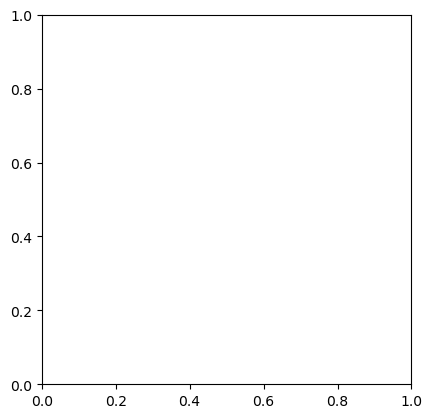

In [10]:
citations.plot()

here i tried counting the instances of a valuse but I didn't specify so it gave me data type information... i think

In [ ]:
citations.value_counts()

Series([], dtype: int64)

so i tried specifying a variable. This is a sample of the area name in 5 random rows of data

In [12]:
citations['Area Name'].sample(5)

1174      Rampart
1681      Rampart
2644      Central
4898    Hollywood
1096      Rampart
Name: Area Name, dtype: object

Now i want to count all the times a citation happens (one citation per row of data) in the data set

In [13]:
citations['Area Name'].value_counts()

Rampart        1288
Newton         1114
Central         996
Hollywood       428
Mission         285
Northeast       153
Southwest       109
Topanga          98
Foothill         92
West Valley      91
Olympic          73
Van Nuys         56
Harbor           52
West LA          51
N Hollywood      48
Hollenbeck       43
77th Street      30
Pacific          30
Wilshire         26
Southeast        24
Devonshire       10
Name: Area Name, dtype: int64

yay! it did what i asked so i saved this manipulation as "area count"

In [14]:
area_count = citations['Area Name'].value_counts()
area_count

Rampart        1288
Newton         1114
Central         996
Hollywood       428
Mission         285
Northeast       153
Southwest       109
Topanga          98
Foothill         92
West Valley      91
Olympic          73
Van Nuys         56
Harbor           52
West LA          51
N Hollywood      48
Hollenbeck       43
77th Street      30
Pacific          30
Wilshire         26
Southeast        24
Devonshire       10
Name: Area Name, dtype: int64

check to see how this information is saved in python - its a series

In [15]:
type(area_count)

pandas.core.series.Series

turn it into an index so i can mess around with it more

In [16]:
area_count = area_count.reset_index()
area_count

,index,Area Name
0,Rampart,1288
1,Newton,1114
2,Central,996
3,Hollywood,428
4,Mission,285
5,Northeast,153
6,Southwest,109
7,Topanga,98
8,Foothill,92
9,West Valley,91


add column headers

In [17]:
area_count.columns = ['area', 'count']

check work

In [18]:
area_count

,area,count
0,Rampart,1288
1,Newton,1114
2,Central,996
3,Hollywood,428
4,Mission,285
5,Northeast,153
6,Southwest,109
7,Topanga,98
8,Foothill,92
9,West Valley,91


plotting still doesnt work, i think its becasue there is such a big difference between 10 arrests in Devonshire and 1,288 in Rampart so I try to trim the data more to make it say something. 

In the next rows I am poking around the new data set i created called area count to figure out what is what

In [19]:
area_count.plot

In [20]:
area_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   area    21 non-null     object
 1   count   21 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [21]:
citations.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5097 entries, 0 to 5096
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Report ID                 5097 non-null   object  
 1   Arrest Date               5097 non-null   object  
 2   Time                      5097 non-null   object  
 3   Area ID                   5097 non-null   object  
 4   Area Name                 5097 non-null   object  
 5   Reporting District        5097 non-null   object  
 6   Age                       5097 non-null   object  
 7   Sex Code                  5097 non-null   object  
 8   Descent Code              5097 non-null   object  
 9   Charge Group Code         5097 non-null   object  
 10  Charge Group Description  5097 non-null   object  
 11  Arrest Type Code          5097 non-null   object  
 12  Charge                    5097 non-null   object  
 13  Charge Description        5097 non-null 

i decide to call the old data set citations with just the arrest date, area name, age, and charge

In [22]:
citations[['Arrest Date','Area Name','Age','Charge Description']]

,Arrest Date,Area Name,Age,Charge Description
0,5/13/10,Hollenbeck,65,ILLEGAL STREET/SIDEWALK SALES
1,5/9/10,Hollenbeck,41,ILLEGAL STREET/SIDEWALK SALES
2,5/14/10,Hollenbeck,36,ILLEGAL STREET/SIDEWALK SALES
3,5/14/10,Hollenbeck,50,ILLEGAL STREET/SIDEWALK SALES
4,5/14/10,Hollenbeck,58,ILLEGAL STREET/SIDEWALK SALES
...,...,...,...,...
5092,7/19/12,Hollywood,39,
5093,2/28/12,77th Street,57,
5094,4/6/12,Hollywood,56,
5095,9/16/12,Foothill,45,


create a new subset of the data called desired columns to just look at the arrest date and area name becasue the other information is cool but i am really jusst looking at those two things. then i asked python for a sample of this new subset to check my work

In [23]:
desired_columns = ['Arrest Date','Area Name']

In [24]:
citations[desired_columns].sample(5)

,Arrest Date,Area Name
4750,4/28/16,Central
3454,7/25/13,Northeast
4367,10/5/14,Newton
2451,12/13/12,Newton
4834,12/1/10,Central


named this cleaned up version "citations_trimmed"

In [25]:
citations_trimmed = citations[desired_columns].copy()
citations_trimmed

,Arrest Date,Area Name
0,5/13/10,Hollenbeck
1,5/9/10,Hollenbeck
2,5/14/10,Hollenbeck
3,5/14/10,Hollenbeck
4,5/14/10,Hollenbeck
...,...,...
5092,7/19/12,Hollywood
5093,2/28/12,77th Street
5094,4/6/12,Hollywood
5095,9/16/12,Foothill


added two columns one for the year and one for the month so i could sort my year and month seperately instead of individual dates

In [41]:
citations_trimmed['year'] = ''
citations_trimmed['month']=''
citations_trimmed


,Arrest Date,Area Name,year,month
0,5/13/10,Hollenbeck,,
1,5/9/10,Hollenbeck,,
2,5/14/10,Hollenbeck,,
3,5/14/10,Hollenbeck,,
4,5/14/10,Hollenbeck,,
...,...,...,...,...
5092,7/19/12,Hollywood,,
5093,2/28/12,77th Street,,
5094,4/6/12,Hollywood,,
5095,9/16/12,Foothill,,


looked at which variable are unique that i could sort by

In [42]:
citations_trimmed['Arrest Date'].unique()

array(['5/13/10', '5/9/10', '5/14/10', ..., '9/28/12', '3/24/12',
       '7/19/12'], dtype=object)

i wanted to be able to sort by month and year so i imported this thing in python called datetime that would recognize a string as a date and then be able to differentiate which integer represnts month v year v day. This took me a LONG time

In [43]:
import datetime
input = citations_trimmed['Arrest Date']
format = '%m/%d/%y'
for i in input:
    citations_trimmed['month'] = datetime.datetime.strptime(i, format).date()

i moved the datetime version of the date of arrest into my new month and year columns. 

In [44]:
import datetime
input = citations_trimmed['Arrest Date']
format = '%m/%d/%y'
for i in input:
    citations_trimmed['year'] = datetime.datetime.strptime(i, format).date()

then i trimmed them up to just look at the year and month this took me an even longer time..

In [45]:
citations_trimmed['year'] = pd.DatetimeIndex(citations_trimmed['Arrest Date']).year

In [46]:
citations_trimmed['month'] = pd.DatetimeIndex(citations_trimmed['Arrest Date']).month

check work... MAGIC!

In [47]:
citations_trimmed

,Arrest Date,Area Name,year,month
0,5/13/10,Hollenbeck,2010,5
1,5/9/10,Hollenbeck,2010,5
2,5/14/10,Hollenbeck,2010,5
3,5/14/10,Hollenbeck,2010,5
4,5/14/10,Hollenbeck,2010,5
...,...,...,...,...
5092,7/19/12,Hollywood,2012,7
5093,2/28/12,77th Street,2012,2
5094,4/6/12,Hollywood,2012,4
5095,9/16/12,Foothill,2012,9


sort to just look at the month of august and save that as a new data set called august

In [ ]:
august = citations_trimmed.loc[citations_trimmed['month'] == 8]
august

,Arrest Date,Area Name,year,month
39,8/6/10,Harbor,2010,8
40,8/6/10,Harbor,2010,8
41,8/6/10,Harbor,2010,8
42,8/8/10,Harbor,2010,8
43,8/7/10,Harbor,2010,8
...,...,...,...,...
4997,8/31/10,Southwest,2010,8
5083,8/17/12,Hollywood,2012,8
5084,8/18/12,Hollywood,2012,8
5088,8/18/12,Hollywood,2012,8


sort my august data set to just look at 2010, i will do the same with 2012 and 2014 to compare across years. when i looked at this i realized that it was not doing the value count thing which i need it to in order to plot. 

In [66]:
august_ten = august.loc[august['year'] == 2010] 
august_ten

,Arrest Date,Area Name,year,month
39,8/6/10,Harbor,2010,8
40,8/6/10,Harbor,2010,8
41,8/6/10,Harbor,2010,8
42,8/8/10,Harbor,2010,8
43,8/7/10,Harbor,2010,8
44,8/6/10,Harbor,2010,8
127,8/7/10,Hollywood,2010,8
128,8/7/10,Hollywood,2010,8
130,8/14/10,Hollywood,2010,8
131,8/19/10,Hollywood,2010,8


now i counted every instance there is an arrest by area name in august of 2010

In [71]:
aug_ten_count=august_ten['Area Name'].value_counts()
aug_ten_count

Rampart        9
Newton         7
Harbor         6
Central        6
West Valley    5
Mission        5
Hollywood      4
Van Nuys       4
Northeast      4
Southwest      3
Topanga        2
Foothill       1
Olympic        1
Name: Area Name, dtype: int64

turn this into an index so i can graph it

In [73]:
aug_ten_count = aug_ten_count.reset_index()
aug_ten_count

,level_0,index,Area Name
0,0,Rampart,9
1,1,Newton,7
2,2,Harbor,6
3,3,Central,6
4,4,West Valley,5
5,5,Mission,5
6,6,Hollywood,4
7,7,Van Nuys,4
8,8,Northeast,4
9,9,Southwest,3


now put this information into a bar graph to display it visually

<AxesSubplot: title={'center': ' Number Street Vendor Citations in August of 2010 by Area'}, xlabel='index'>

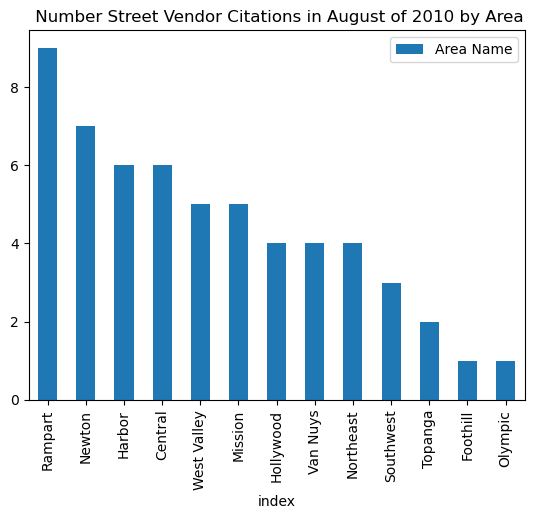

In [76]:
aug_ten_count.plot.bar(x = 'index', y = 'Area Name', title = ' Number Street Vendor Citations in August of 2010 by Area')

repeat with 2012 and 2014 - go back to the august sorted data set and pull out the years 2012 and 2014

In [79]:
august_twelve = august.loc[august['year'] == 2012] 
august_fourteen = august.loc[august['year'] == 2014] 

do a value count of those years to see how many citations happen in august of each year per area 

In [81]:
aug_twelve_count=august_twelve['Area Name'].value_counts()
aug_fourteen_count=august_fourteen['Area Name'].value_counts()

reset them to an index

In [82]:
aug_twelve_count = aug_twelve_count.reset_index()
aug_fourteen_count = aug_fourteen_count.reset_index()

make a bar graph of 2012 citations

<AxesSubplot: title={'center': ' Number Street Vendor Citations in August of 2012 by Area'}, xlabel='index'>

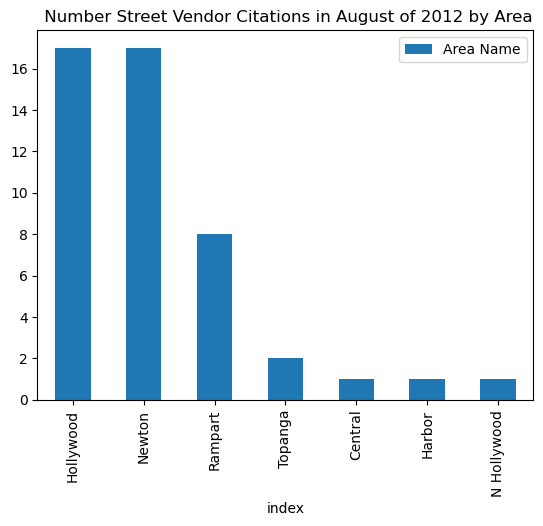

In [83]:
aug_twelve_count.plot.bar(x = 'index', y = 'Area Name', title = ' Number Street Vendor Citations in August of 2012 by Area')

make another one for 2014

<AxesSubplot: title={'center': ' Number Street Vendor Citations in August of 2014 by Area'}, xlabel='index'>

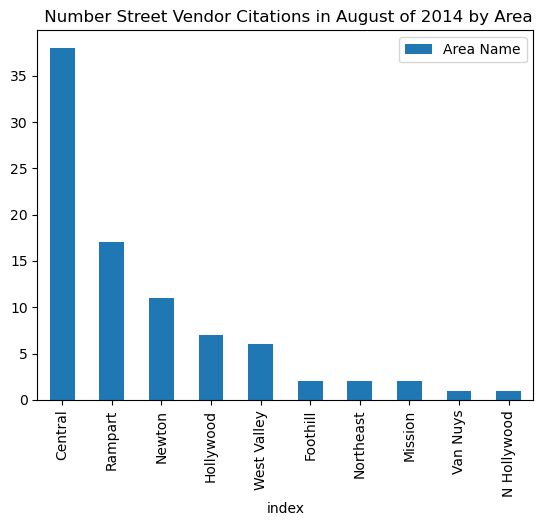

In [84]:
aug_fourteen_count.plot.bar(x = 'index', y = 'Area Name', title = ' Number Street Vendor Citations in August of 2014 by Area')